In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem statement
How the student's performance affected by other factors

In [4]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape

(1000, 8)

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No null values in the record.

total 1000 records each having 8 features

In [7]:
data.duplicated().sum()

0

There is no duplicates

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


only scores are integer type.

In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Looks like there is no outliers

and all score distribusion almost similar

Adding columns for Total score and avg score

In [10]:
data['total_score']=data['math score']+ data['reading score']+ data['writing score']
data['avg_score']= data['total_score']/3

## EDA

In [11]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'avg_score'],
      dtype='object')

In [13]:
data.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

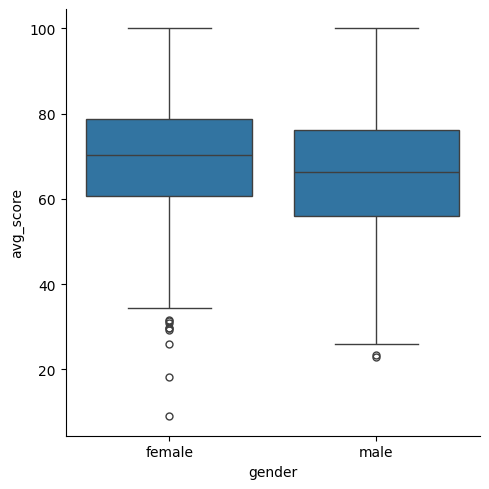

In [16]:
sns.catplot(data=data,x='gender',y='avg_score',kind = 'box')

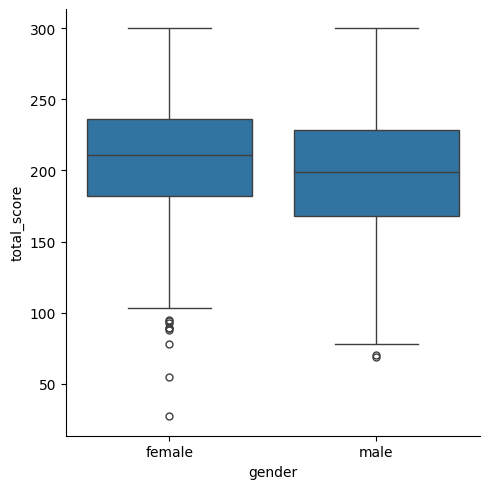

In [17]:
sns.catplot(data=data,x='gender',y='total_score',kind = 'box')

there is no much difference in the score of male and female

but female score is little higher than males

In [18]:
data.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'avg_score'],
      dtype='object')

In [19]:
data.lunch.value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

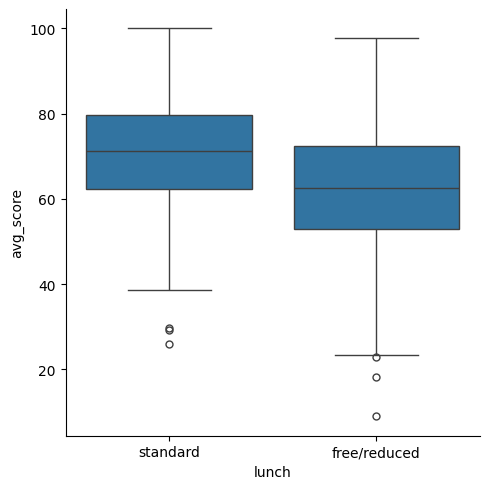

In [20]:
sns.catplot(data=data,x='lunch',y='avg_score',kind = 'box')

standard lunch helps perform well in exam


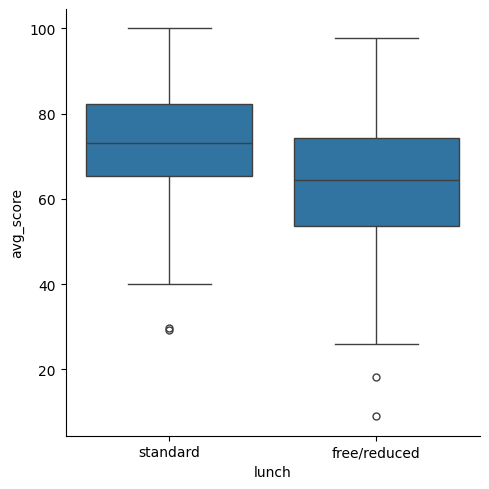

In [21]:
sns.catplot(data=data[data.gender=='female'],x='lunch',y='avg_score',kind = 'box')

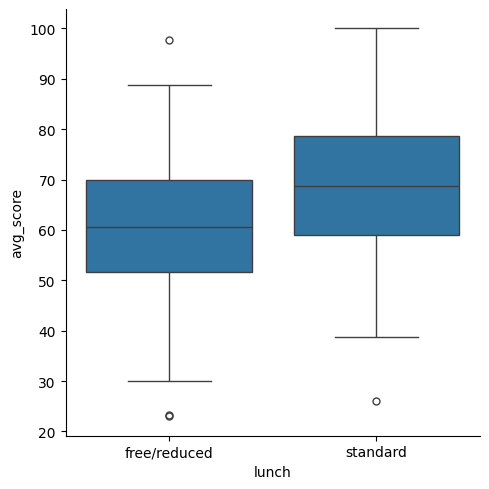

In [22]:
sns.catplot(data=data[data.gender=='male'],x='lunch',y='avg_score',kind = 'box')

In [23]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'avg_score'],
      dtype='object')

<Figure size 10000x50000 with 0 Axes>

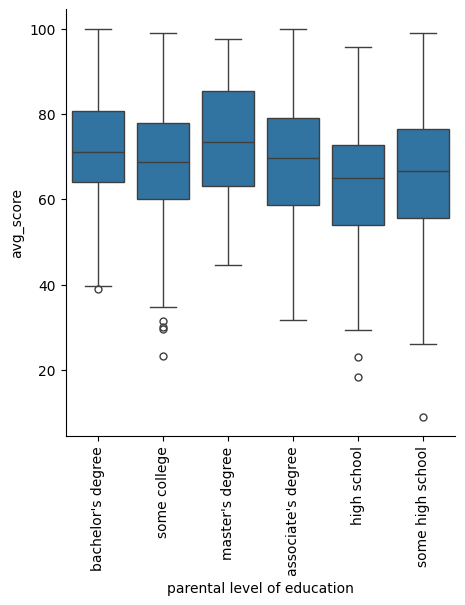

In [30]:
plt.figure(figsize=(100,500))

sns.catplot(data=data, x ='parental level of education',y='avg_score',kind = 'box')
plt.xticks(rotation=90)
plt.show()

<Figure size 10000x50000 with 0 Axes>

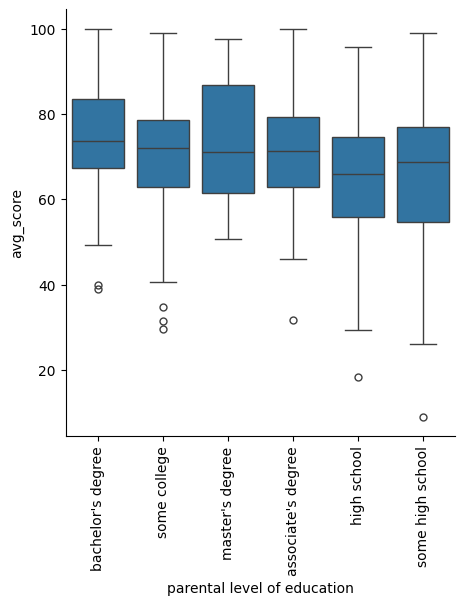

In [31]:
plt.figure(figsize=(100,500))

sns.catplot(data=data[data.gender=='female'], x ='parental level of education',y='avg_score',kind = 'box')
plt.xticks(rotation=90)
plt.show()

<Figure size 10000x50000 with 0 Axes>

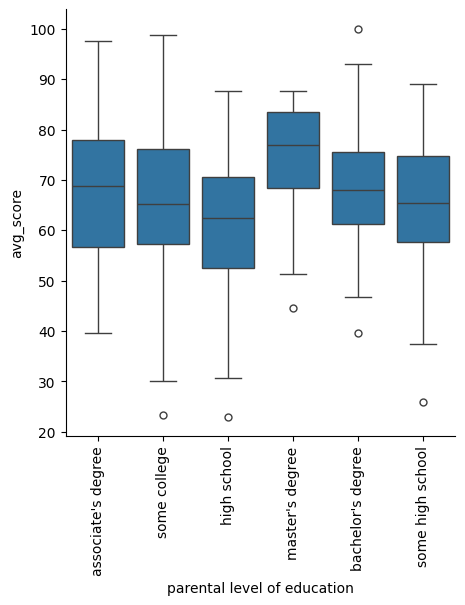

In [32]:
plt.figure(figsize=(100,500))

sns.catplot(data=data[data.gender=='male'], x ='parental level of education',y='avg_score',kind = 'box')
plt.xticks(rotation=90)
plt.show()

paternts having master or associates's dgree students perform better

In [33]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

<Figure size 10000x50000 with 0 Axes>

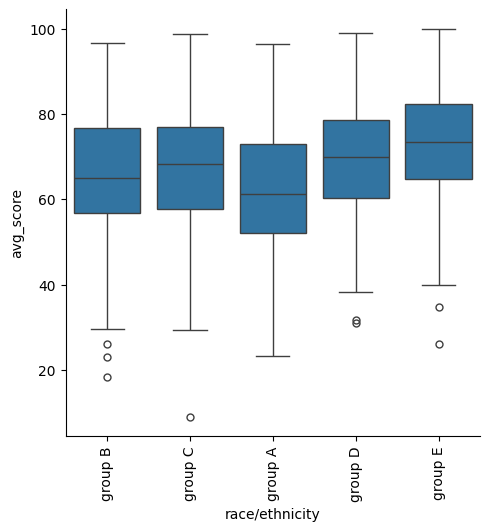

In [34]:
plt.figure(figsize=(100,500))

sns.catplot(data=data, x ='race/ethnicity',y='avg_score',kind = 'box')
plt.xticks(rotation=90)
plt.show()

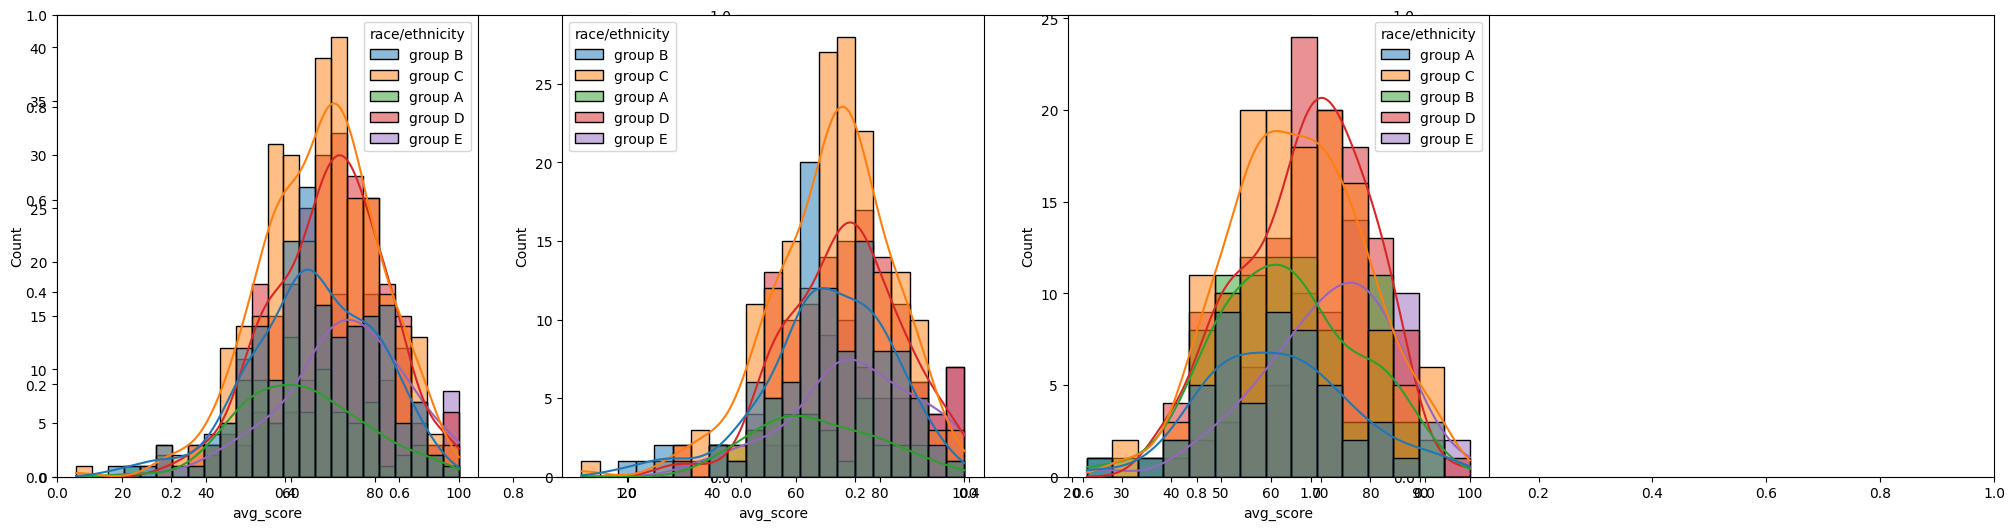

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity')
plt.show()

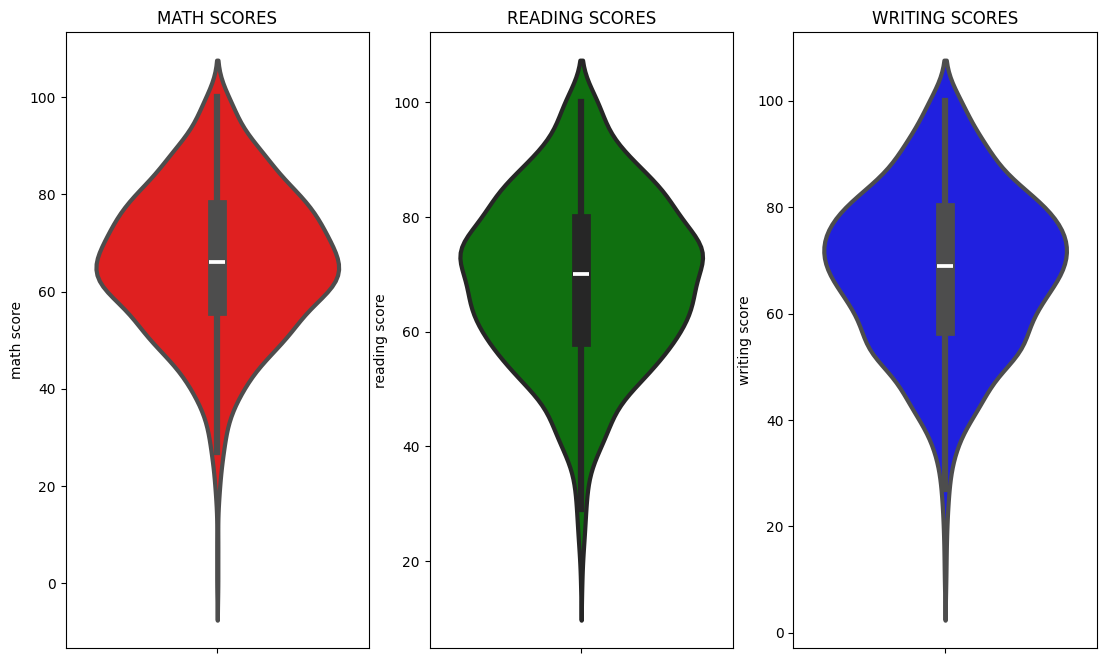

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

How the distribution of gender

gender
female    518
male      482
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

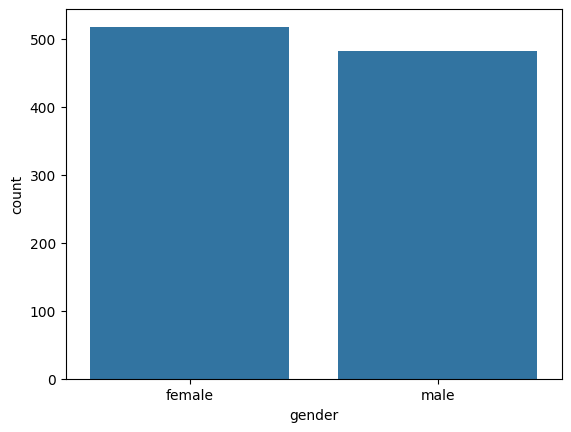

In [39]:
print(data.gender.value_counts())
sns.countplot(data=data,x='gender')

gender has balanced data

In [40]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

<Axes: xlabel='race/ethnicity', ylabel='count'>

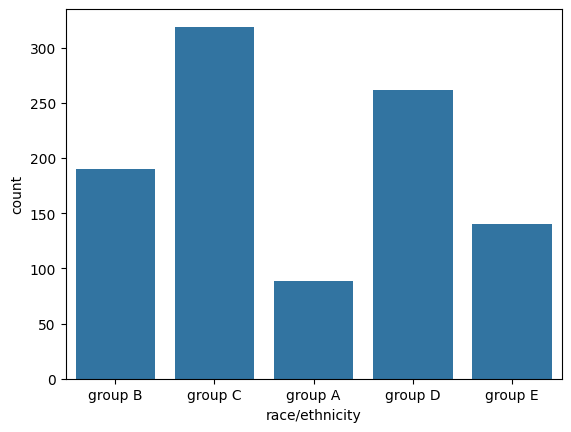

In [41]:
sns.countplot(data=data,x='race/ethnicity')

most data belongs to group C and D

In [42]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'avg_score'],
      dtype='object')

In [43]:
data['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

<Axes: xlabel='avg_score', ylabel='Count'>

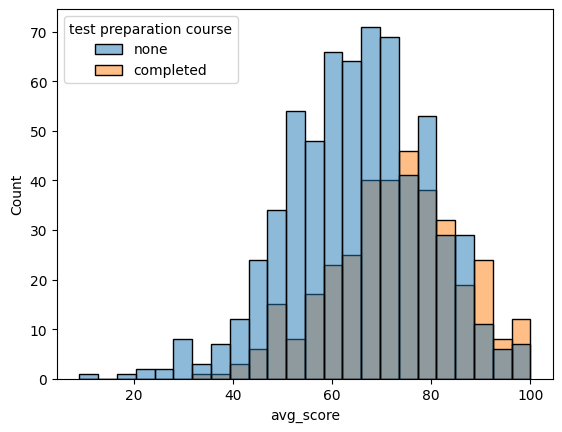

In [48]:
sns.histplot(data=data,x='avg_score',hue = 'test preparation course')

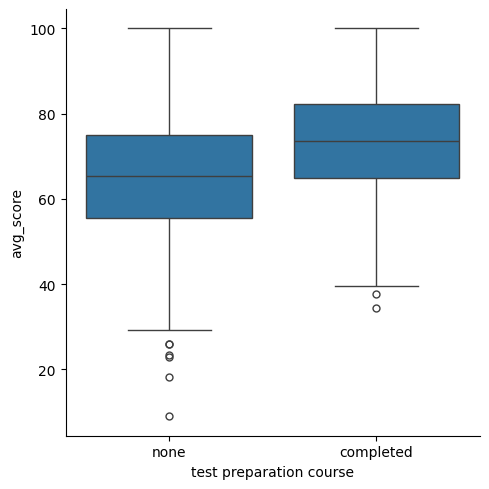

In [51]:
sns.catplot(data=data,x='test preparation course',y='avg_score',kind='box')

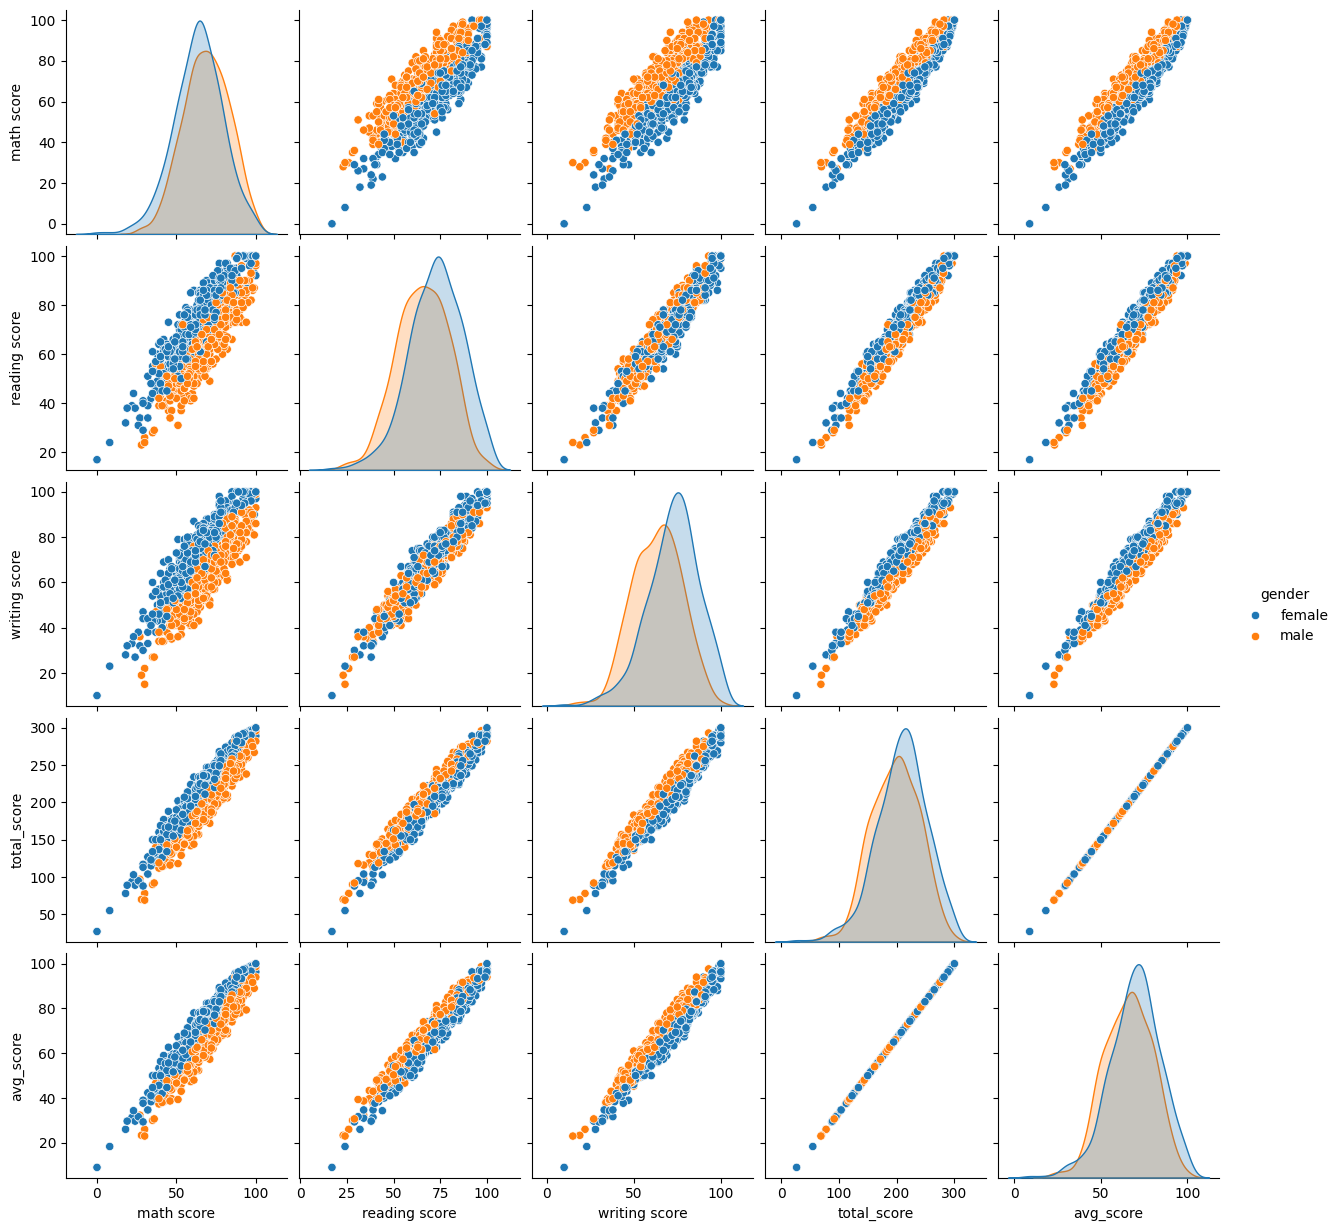

In [52]:
sns.pairplot(data,hue='gender')

all score increase linearly with eachother

Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.

